<a href="https://colab.research.google.com/github/Blackstocks/GenAI/blob/main/ANN_practical_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install tensorflow

In [27]:
import tensorflow as tf

In [28]:
print(tf.__version__)

2.18.0


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
dataset = pd.read_csv('Churn_Modelling.csv')


In [31]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [33]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [34]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [35]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [36]:
pd.get_dummies(x['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [41]:
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [42]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [39]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [43]:
pd.concat([x,geography,gender],axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,False,True


In [44]:
# Drop Geography and Gender columns
x = x.drop(['Geography', 'Gender'], axis=1)

In [45]:
from sklearn.model_selection import train_test_split

x_traink,x_testk,y_traink,y_testk = train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [47]:
x_traink = sc.fit_transform(x_traink)
x_testk = sc.transform(x_testk)

In [48]:
x_traink

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [49]:
x_testk

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [50]:
x_traink.shape

(8000, 8)

In [51]:
x_testk.shape

(2000, 8)

In [52]:
#lets create ANN
#library tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [53]:
#initializing our ANN
classifier = Sequential()

In [54]:
#adding input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=7,activation='relu')) # first hidden layer
classifier.add(Dense(units=6,activation='relu')) # second hidden layer
classifier.add(Dense(units=1,activation='sigmoid'))# output layer

In [55]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [40]:
# import tensorflow
# optm = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [58]:
moodel_history = classifier.fit(x_traink,y_traink,validation_split=0.33,batch_size=10,epochs=100, callbacks=[early_stopping])

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6725 - loss: 0.6161 - val_accuracy: 0.7955 - val_loss: 0.4966
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7961 - loss: 0.4772 - val_accuracy: 0.8073 - val_loss: 0.4539
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8199 - loss: 0.4326 - val_accuracy: 0.8133 - val_loss: 0.4358
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8323 - loss: 0.4168 - val_accuracy: 0.8254 - val_loss: 0.4115
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8574 - loss: 0.3650 - val_accuracy: 0.8379 - val_loss: 0.3934
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8516 - loss: 0.3577 - val_accuracy: 0.8387 - val_loss: 0.3901
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8569 - loss: 0.3518 - val_accuracy: 0.8455 - val_loss: 0.3847
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8445 - loss: 0.3662 - val_accu

In [69]:
classifier.get_weights()

[array([[-0.00218783, -0.14932896, -0.08772551,  0.2948941 , -0.14517342,
          0.02336654,  0.03777079,  0.10440043,  0.12414714,  0.01773687,
          0.25530478],
        [-0.05964873,  0.10457145,  1.1620336 ,  0.33170414, -0.14622381,
         -0.30847746, -0.96479243, -0.6911108 , -0.01895602,  0.52490145,
         -0.22922537],
        [ 0.27243122, -0.3191818 , -0.2021483 ,  0.20725663,  0.21371752,
         -0.01499719, -0.08690216,  0.02626748, -0.03669735,  0.00811084,
         -0.11372264],
        [-0.06312717, -0.50772965,  0.22545114, -0.57862854, -1.3878928 ,
          0.05892349, -0.1634361 ,  0.27244726, -0.54271096, -0.09449834,
         -0.36530337],
        [ 0.13077767, -0.08528341, -0.05005337,  0.11591059,  0.02674735,
          1.220638  ,  0.01451338,  0.5532795 ,  0.97866285, -0.47369912,
          0.14058657],
        [ 0.12823012, -0.32103637, -0.25500348,  0.40524092, -0.13324393,
          0.07432776,  0.13525653, -0.1968371 , -0.23939738,  0.4526244

In [61]:
moodel_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

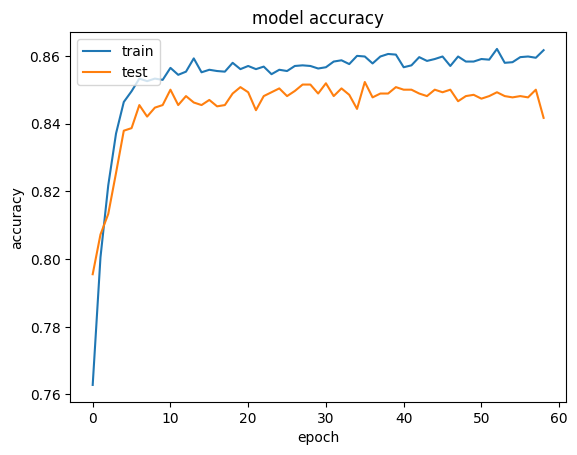

In [62]:
#plotting
plt.plot(moodel_history.history['accuracy'])
plt.plot(moodel_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

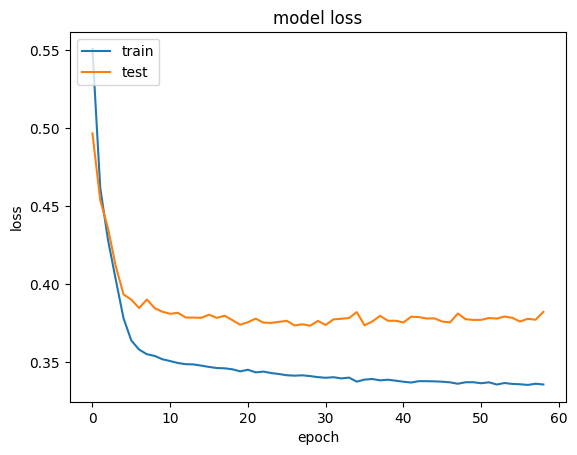

In [64]:
#plotting for the loss
plt.plot(moodel_history.history['loss'])
plt.plot(moodel_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [65]:
#prediction and evaluating model
y_pred = classifier.predict(x_testk)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [66]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testk,y_pred)

In [67]:
cm

array([[1552,   43],
       [ 239,  166]])

In [68]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_testk,y_pred)
score

0.859